In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'MS Gothic']

play_info = pd.read_csv('play_info.csv', encoding='cp932', on_bad_lines='skip', engine='python')
print(play_info.shape)


(254361, 208)


/var/folders/33/_hgbk85d5f90ql149mhsrv0h0000gn/T/ipykernel_74139/169801471.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  swing_rate = swing_data.groupby('speed_range').agg({


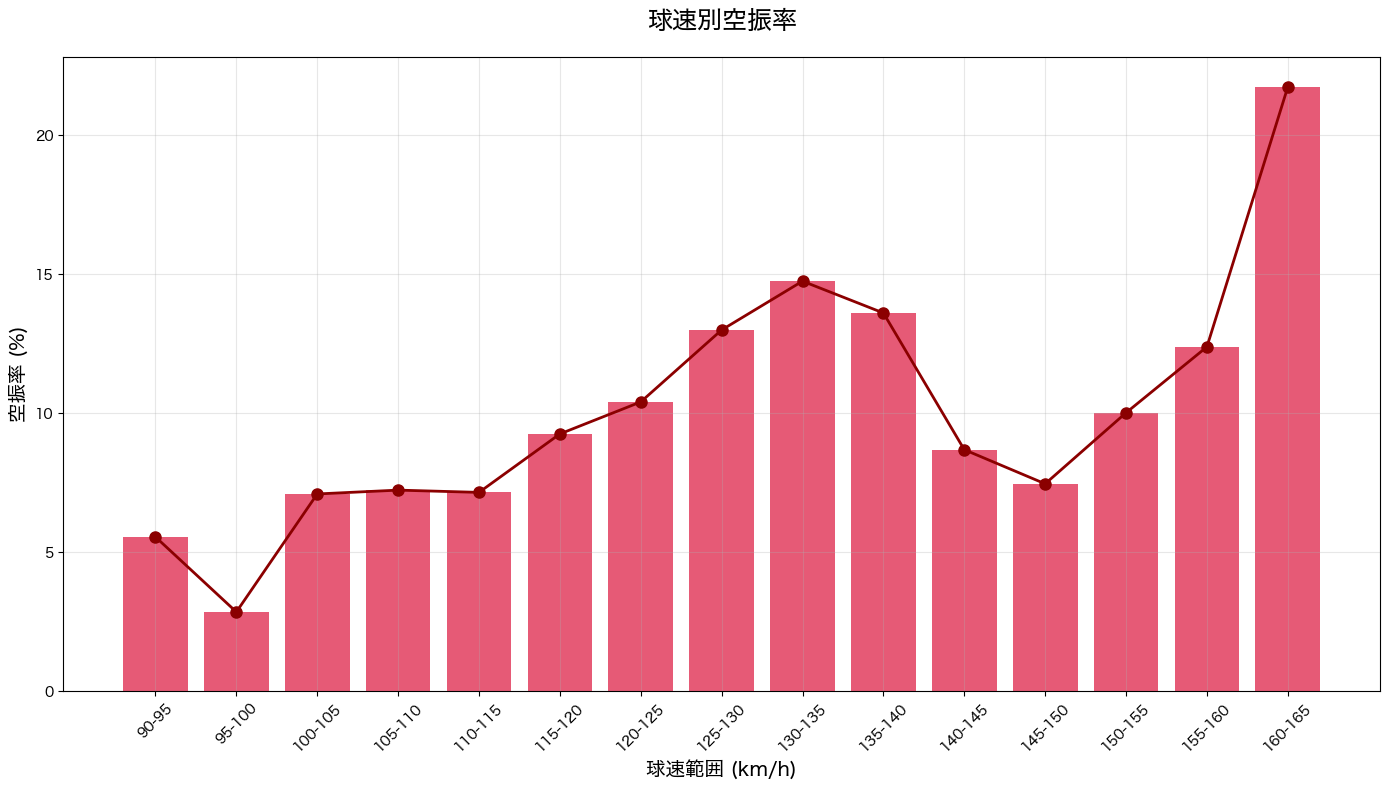

              空振数    投球数        空振率
speed_range                        
(90, 95]        4     72   5.555556
(95, 100]       6    210   2.857143
(100, 105]     37    521   7.101727
(105, 110]    112   1547   7.239819
(110, 115]    236   3297   7.158022
(115, 120]    555   5993   9.260804
(120, 125]   1169  11227  10.412399
(125, 130]   3036  23354  12.999914
(130, 135]   4711  31927  14.755536
(135, 140]   4893  35949  13.610949
(140, 145]   3571  41073   8.694276
(145, 150]   3655  48951   7.466650
(150, 155]   2168  21634  10.021263
(155, 160]    318   2566  12.392829
(160, 165]      5     23  21.739130


In [3]:
swing_data = play_info[['pitch_speed', 'pitch_result', 'pitch_type_name']].dropna()
swing_data = swing_data[swing_data['pitch_speed'] > 0]

swing_data['is_swinging_strike'] = swing_data['pitch_result'].str.contains('空振', na=False)

speed_bins = np.arange(90, 170, 5)
swing_data['speed_range'] = pd.cut(swing_data['pitch_speed'], bins=speed_bins)

swing_rate = swing_data.groupby('speed_range').agg({
    'is_swinging_strike': ['sum', 'count']
})
swing_rate.columns = ['空振数', '投球数']
swing_rate['空振率'] = (swing_rate['空振数'] / swing_rate['投球数'] * 100)

plt.figure(figsize=(14,8))
x_pos = range(len(swing_rate))
plt.bar(x_pos, swing_rate['空振率'], color='crimson', alpha=0.7)
plt.plot(x_pos, swing_rate['空振率'], marker='o', color='darkred', linewidth=2, markersize=8)
plt.title('球速別空振率', fontsize=18, pad=20)
plt.xlabel('球速範囲 (km/h)', fontsize=14)
plt.ylabel('空振率 (%)', fontsize=14)
plt.xticks(x_pos, [f"{int(i.left)}-{int(i.right)}" for i in swing_rate.index], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(swing_rate)


/var/folders/33/_hgbk85d5f90ql149mhsrv0h0000gn/T/ipykernel_74139/1731651825.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  swing_rate_pitch = pitch_subset.groupby('speed_range').agg({
/var/folders/33/_hgbk85d5f90ql149mhsrv0h0000gn/T/ipykernel_74139/1731651825.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  swing_rate_pitch = pitch_subset.groupby('speed_range').agg({
/var/folders/33/_hgbk85d5f90ql149mhsrv0h0000gn/T/ipykernel_74139/1731651825.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

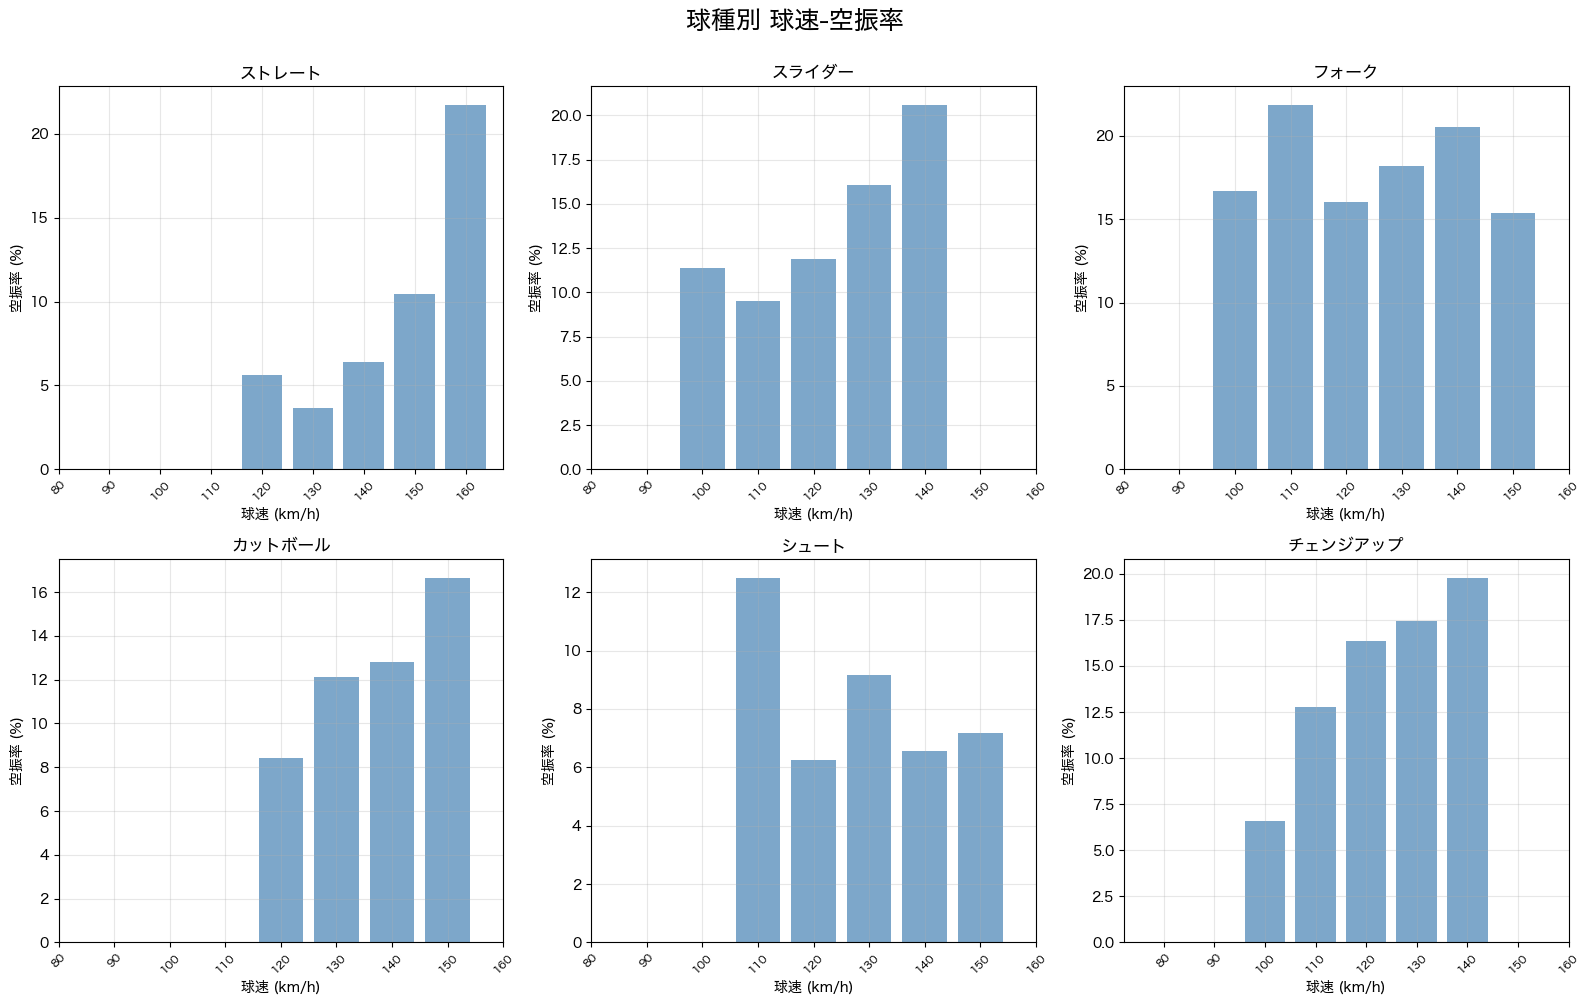

In [4]:
top_pitches = play_info['pitch_type_name'].value_counts().head(6).index

plt.figure(figsize=(16,10))
for i, pitch in enumerate(top_pitches, 1):
    plt.subplot(2, 3, i)
    
    pitch_subset = swing_data[swing_data['pitch_type_name'] == pitch]
    pitch_subset = pitch_subset[pitch_subset['pitch_speed'].between(80, 180)]
    
    speed_bins_pitch = np.arange(80, 180, 10)
    pitch_subset['speed_range'] = pd.cut(pitch_subset['pitch_speed'], bins=speed_bins_pitch)
    
    swing_rate_pitch = pitch_subset.groupby('speed_range').agg({
        'is_swinging_strike': ['sum', 'count']
    })
    swing_rate_pitch.columns = ['空振', '投球']
    swing_rate_pitch['空振率'] = (swing_rate_pitch['空振'] / swing_rate_pitch['投球'] * 100)
    
    x_pos = range(len(swing_rate_pitch))
    plt.bar(x_pos, swing_rate_pitch['空振率'], color='steelblue', alpha=0.7)
    plt.title(f'{pitch}', fontsize=12)
    plt.xlabel('球速 (km/h)', fontsize=10)
    plt.ylabel('空振率 (%)', fontsize=10)
    plt.xticks(x_pos, [f"{int(i.left)}" for i in swing_rate_pitch.index], rotation=45, fontsize=8)
    plt.grid(True, alpha=0.3)

plt.suptitle('球種別 球速-空振率', fontsize=18, y=1.00)
plt.tight_layout()
plt.show()


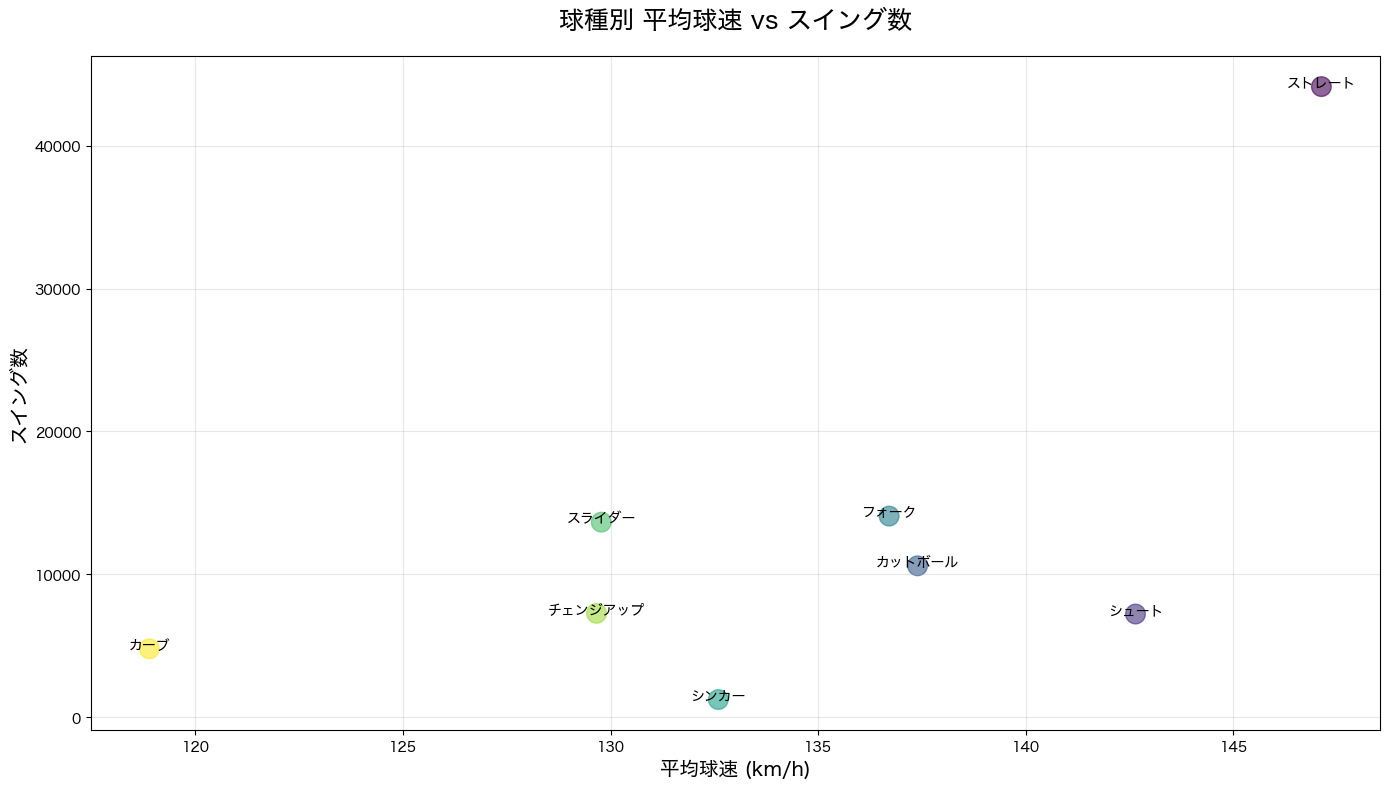

In [5]:
pitch_speed_swing = play_info[['pitch_speed', 'pitch_type_name', 'pitch_result']].dropna()
pitch_speed_swing = pitch_speed_swing[pitch_speed_swing['pitch_speed'] > 0]
pitch_speed_swing['is_swing'] = pitch_speed_swing['pitch_result'].str.contains('空振|ファウル|打|ゴロ|飛', na=False)

pitch_stats = pitch_speed_swing.groupby('pitch_type_name').agg({
    'pitch_speed': 'mean',
    'is_swing': 'sum'
}).rename(columns={'pitch_speed': '平均球速', 'is_swing': 'スイング数'})
pitch_stats = pitch_stats[pitch_stats['スイング数'] > 500].sort_values('平均球速', ascending=False)

plt.figure(figsize=(14,8))
plt.scatter(pitch_stats['平均球速'], pitch_stats['スイング数'], s=200, alpha=0.6, c=range(len(pitch_stats)), cmap='viridis')

for idx, row in pitch_stats.iterrows():
    plt.annotate(idx, (row['平均球速'], row['スイング数']), fontsize=10, ha='center')

plt.title('球種別 平均球速 vs スイング数', fontsize=18, pad=20)
plt.xlabel('平均球速 (km/h)', fontsize=14)
plt.ylabel('スイング数', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


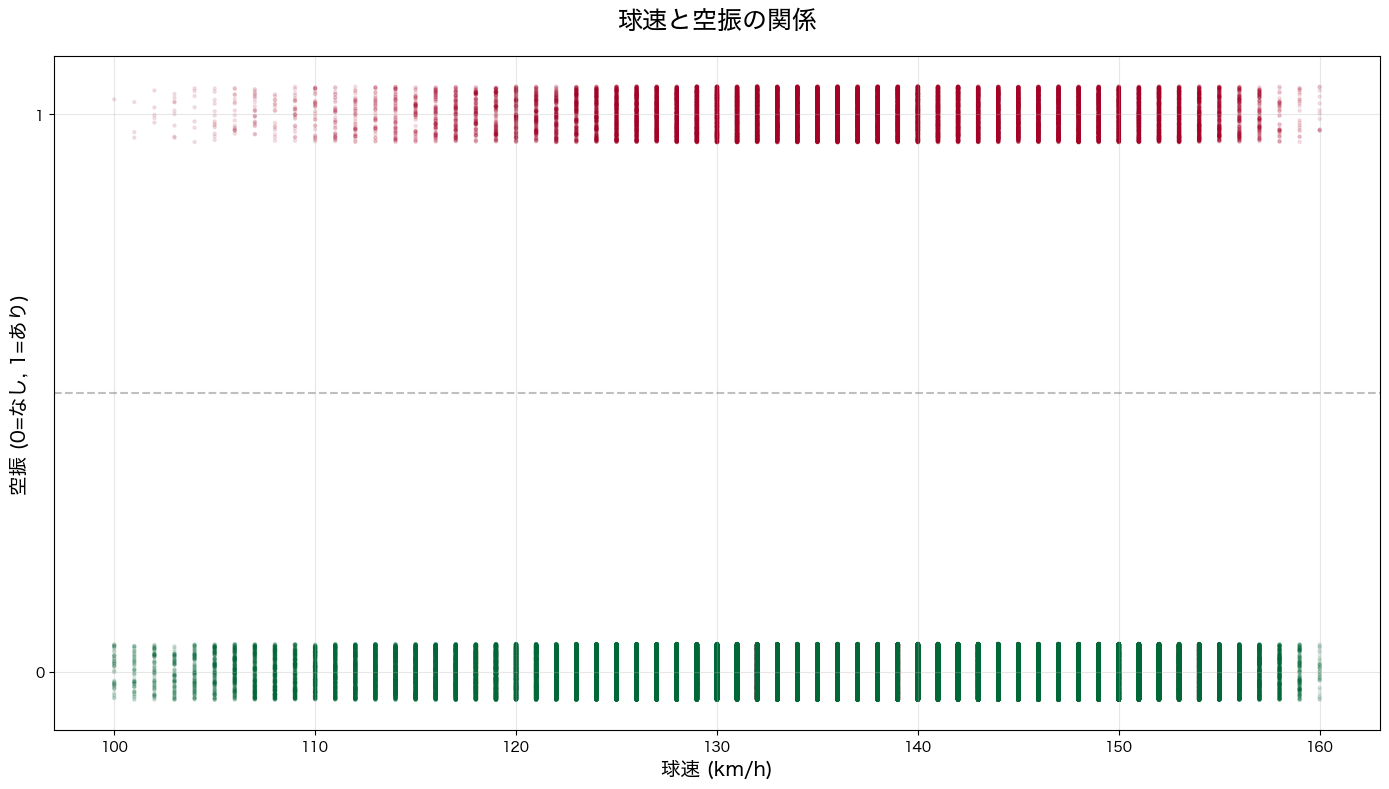

In [8]:
speed_swing = play_info[['pitch_speed', 'is_swinging_strike']].dropna()
speed_swing = speed_swing[speed_swing['pitch_speed'].between(100, 160)]

speed_swing['jitter'] = speed_swing['is_swinging_strike'] + np.random.uniform(-0.05, 0.05, len(speed_swing))

plt.figure(figsize=(14,8))
plt.scatter(speed_swing['pitch_speed'], speed_swing['jitter'], alpha=0.1, s=5, c=speed_swing['is_swinging_strike'], cmap='RdYlGn_r')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.title('球速と空振の関係', fontsize=18, pad=20)
plt.xlabel('球速 (km/h)', fontsize=14)
plt.ylabel('空振 (0=なし, 1=あり)', fontsize=14)
plt.yticks([0, 1])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
